start t-sne
end t-sne
180


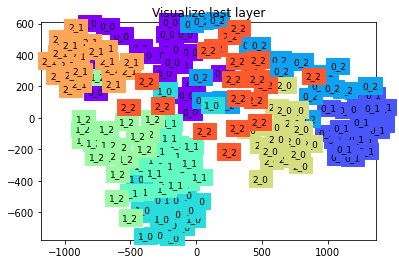

In [19]:
from sklearn.manifold import TSNE
from matplotlib import cm
import torch
from time import time
import pickle
import torch
import numpy as np
import json
from VGG_16_featuredict import VGG16
import os
import torchvision.transforms as T
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from collections import Counter

import torchvision.datasets as datasets
import random
import torch.utils.data as Data
import gc
from sklearn.cluster import KMeans
import numpy as np
import argparse
from model_mask_vgg import mask_VGG16


transform_test = T.Compose([
            T.ToTensor(),
#     T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

dataset = datasets.CIFAR10(
    root = './data/cifar-10',
    train = False,
    transform = transform_test,
    download = False
)


def plot_with_labels(lowDWeights, labels, nums, i):
    plt.cla()
    # 降到二维了，分别给x和y
    X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
    # 遍历每个点以及对应标签
    for x, y, s, num in zip(X, Y, labels, nums):
        
        c = cm.rainbow(int(255/9 * num)) # 为了使得颜色有区分度，把0-255颜色区间分为9分,然后把标签映射到一个区间
        plt.text(x, y, s, backgroundcolor=c, fontsize=9)
    plt.xlim(X.min(), X.max())
    plt.ylim(Y.min(), Y.max()); plt.title('Visualize last layer')

    plt.savefig("{}.jpg".format(i))
    
data_path = "LRP_path/lrp_path_threshold0.9_test.pkl"
with open(data_path, 'rb') as fr:
    paths_all = pickle.load(fr)
    
feature_size = [64, 64, 128, 128, 256, 256, 256, 512, 512, 512, 512, 512, 512]
labels = [] 
nums = []
flag = True
all_feature = 0
for i in feature_size:
    all_feature += i

num_class = 3
num_clu = 3
samples_cluster = 20


for cla in range(num_class):
    for clu in range(3):
        l = "{}_{}".format(cla, clu)
        picked_samples_fname = "cluster_paths/num_cluster3_threshold0.7_class{}_cluster{}_picked_samples.pkl".format(cla, clu)
        with open(picked_samples_fname, "rb") as f:
            unpickler = pickle.Unpickler(f)
            picked_samples = unpickler.load()
        paths = []
        
        for i, index in enumerate(picked_samples):
            if i < samples_cluster:
                paths.append(paths_all[index])
        
        for p in paths: 
            u = []
            for layer, layer_units in enumerate(p):  
                u.extend(layer_units)
                pad = [-1 for _ in range(feature_size[layer]-len(layer_units))]
                u.extend(pad)
            u = np.array(u)
#             print("len_u", len(u))
            if flag:
                flatten_paths = u
                flag = False
            else:
                flatten_paths = np.vstack((flatten_paths, u))
       
            labels.append(l)
            nums.append(cla*3 + clu)
# print(flatten_paths)
labels = np.array(labels)
nums = np.array(nums)     
# print(nums)
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000) # TSNE降维，降到2

# 只需要显示前10000个
plot_only = 10000
# 降维后的数据
print("start t-sne")
t0 = time()
low_dim_embs = tsne.fit_transform(flatten_paths)
print("end t-sne")
# 标签
print(len(low_dim_embs))
plot_with_labels(low_dim_embs, labels, nums, 'tsne_images/t-SNE embedding of the digits (time %.2fs)' % (time() - t0))


start t-sne
end t-sne


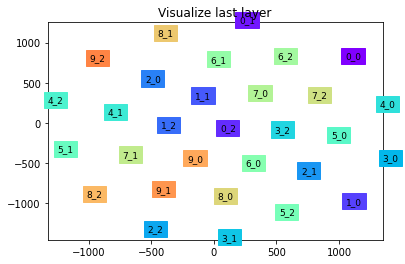

In [18]:
from sklearn.manifold import TSNE
from matplotlib import cm
import torch
from time import time
import pickle
import torch
import numpy as np
import json
from VGG_16_featuredict import VGG16
import os
import torchvision.transforms as T
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from collections import Counter

import torchvision.datasets as datasets
import random
import torch.utils.data as Data
import gc
from sklearn.cluster import KMeans
import numpy as np
import argparse
from model_mask_vgg import mask_VGG16


transform_test = T.Compose([
            T.ToTensor(),
#     T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

dataset = datasets.CIFAR10(
    root = './data/cifar-10',
    train = False,
    transform = transform_test,
    download = False
)


def plot_with_labels(lowDWeights, labels, nums, i):
    plt.cla()
    # 降到二维了，分别给x和y
    X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
    # 遍历每个点以及对应标签
    for x, y, s, num in zip(X, Y, labels, nums):
        
        c = cm.rainbow(int(255/35 * num)) # 为了使得颜色有区分度，把0-255颜色区间分为9分,然后把标签映射到一个区间
        plt.text(x, y, s, backgroundcolor=c, fontsize=9)
    plt.xlim(X.min(), X.max())
    plt.ylim(Y.min(), Y.max()); plt.title('Visualize last layer')

    plt.savefig("{}.jpg".format(i))
    
data_path = "LRP_path/lrp_path_threshold0.9_test.pkl"
with open(data_path, 'rb') as fr:
    paths_all = pickle.load(fr)
    
feature_size = [64, 64, 128, 128, 256, 256, 256, 512, 512, 512, 512, 512, 512]
labels = [] 
nums = []
flatten_paths = []
num_class = 10
num_clu = 3


for cla in range(num_class):
    for clu in range(3):
        l = "{}_{}".format(cla, clu)
        picked_samples_fname = "cluster_paths/num_cluster3_threshold0.7_class{}_cluster{}_paths.pkl".format(cla, clu)
        with open(picked_samples_fname, "rb") as f:
            unpickler = pickle.Unpickler(f)
            path = unpickler.load()
        path = path[0]
        u = []
        for layer, layer_units in enumerate(path):  
            u.extend(sorted(layer_units))
            pad = [-1 for _ in range(feature_size[layer]-len(layer_units))]
            u.extend(pad)
#             print(u)
#         print(len(u))
        flatten_paths.append(u)      
        labels.append(l)
        nums.append(cla*3 + clu)

# print(flatten_paths)
# print(len(labels))
# print(nums)
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000) # TSNE降维，降到2

# 只需要显示前10000个
plot_only = 10000
# 降维后的数据
print("start t-sne")
t0 = time()
low_dim_embs = tsne.fit_transform(np.array(flatten_paths))
print("end t-sne")
# 标签
labels = np.array(labels)
nums = np.array(nums)
plot_with_labels(low_dim_embs, labels, nums, 'tsne_images/t-SNE embedding of the digits (time %.2fs)' % (time() - t0))


In [27]:
length = [0 for i in range(13)]
for cla in range(10):
    for clu in range(3):
        l = "{}_{}".format(cla, clu)
        picked_samples_fname = "cluster_paths/num_cluster3_threshold0.4_class{}_cluster{}_paths.pkl".format(cla, clu)
        with open(picked_samples_fname, "rb") as f:
            unpickler = pickle.Unpickler(f)
            path = unpickler.load()

        for i in range(13):
            length[i] += len(path[0][i])
for i in range(13):
    length[i] = round(length[i]/30)
print(length)

[16, 41, 65, 80, 57, 16, 16, 8, 5, 5, 5, 3, 98]


In [40]:
length = [0 for i in range(13)]
data_path = "LRP_path/lrp_path_threshold1.0_test.pkl"
with open(data_path, 'rb') as fr:
    paths_all = pickle.load(fr)
    print(len(paths_all))
    for p in range(len(paths_all)):
#         print("?")
        for i in range(13):
            length[i] += len(paths_all[p][i])
for i in range(13):
    length[i] = round(length[i]/len(paths_all))
print(length)

10000
[30, 59, 101, 116, 127, 52, 39, 19, 11, 10, 10, 6, 146]
